In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras

2023-07-14 12:02:28.963872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.12.0'

In [4]:
data = pd.read_csv("/home/emanuele/Postdoc_ICAR/results/Survey_Methods/Sliced_Kidney_depMat.csv", index_col=0)
data 

,Kidney ACH-000159,Kidney ACH-000189,Kidney ACH-000234,Kidney ACH-000246,Kidney ACH-000250,Kidney ACH-000262,Kidney ACH-000272,Kidney ACH-000313,Kidney ACH-000317,Kidney ACH-000375,...,Kidney ACH-000907,Kidney ACH-001163,Kidney ACH-001194,Kidney ACH-001310,Kidney ACH-001398,Kidney ACH-001532,Kidney ACH-001687,Kidney ACH-001688,Kidney ACH-002150,Kidney ACH-002189
A1BG (1),-0.098583,0.025497,0.039759,-0.085034,-0.060763,-0.327514,0.023482,-0.047076,0.072916,-0.313158,...,-0.014384,-0.043480,0.170909,-0.133501,0.016807,-0.021419,-0.126049,-0.015302,-0.071998,0.006178
A1CF (29974),-0.194067,0.190203,0.003615,-0.016881,-0.025410,0.148797,-0.078053,-0.111188,-0.329842,-0.276735,...,-0.081780,-0.085841,-0.097003,0.016634,0.135088,-0.012608,-0.170539,0.115991,0.163529,-0.200031
A2M (2),0.056482,-0.064422,-0.060224,-0.007607,0.038200,0.068109,-0.014195,0.025927,0.027071,-0.172022,...,-0.036533,-0.079882,-0.013476,-0.010148,-0.183250,0.041469,0.137907,-0.229729,-0.098859,-0.038372
A2ML1 (144568),-0.043275,0.214010,0.081227,-0.007732,0.095462,0.034221,0.038967,0.075762,-0.098717,-0.102884,...,0.120296,0.128083,0.167051,0.048080,0.079721,0.085239,0.245497,0.106801,0.096733,0.109694
A3GALT2 (127550),0.042775,0.234450,-0.019064,0.047906,-0.096162,-0.055449,-0.204893,-0.164694,-0.188205,0.132969,...,-0.095750,-0.052707,-0.483428,-0.212870,-0.319487,-0.063677,-0.084950,-0.196248,-0.049440,-0.287985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A (440590),-0.214984,-0.122164,0.061923,0.043799,-0.021958,-0.008360,-0.031557,-0.093109,-0.134824,0.054312,...,-0.243649,-0.022502,-0.030715,-0.190116,0.126185,0.047339,-0.104483,-0.031745,0.062013,-0.098642
ZYG11B (79699),-0.222925,-0.429341,-0.168435,-0.200763,-0.124535,-0.254806,-0.211923,-0.242198,-0.083352,-0.181971,...,-0.112868,0.085608,-0.083577,-0.265525,-0.398217,-0.184396,-0.371834,-0.216044,-0.141312,-0.148466
ZYX (7791),0.015540,-0.092973,0.032190,-0.330597,-0.081643,-0.224664,-0.050358,-0.028192,-0.123594,-0.496452,...,-0.293738,-0.172174,-0.061577,-0.118704,-0.119744,-0.241001,-0.104015,-0.012809,-0.058903,0.023899
ZZEF1 (23140),-0.105381,0.038808,-0.224601,-0.041535,-0.042718,-0.081895,-0.096986,-0.161992,0.188246,0.016271,...,0.016769,-0.259722,-0.129833,-0.392298,0.056096,-0.154736,-0.224777,-0.113155,-0.046388,-0.207682


In [5]:
labels = pd.read_csv("/home/emanuele/Postdoc_ICAR/results/Survey_Methods/EPGAT/essential-gene-detection/data/essential_genes/human/EssentialGenes/ogee.csv", index_col=0)

In [6]:
X_full = data.to_numpy()
y_full = labels.to_numpy()

In [7]:
X_full.shape, y_full.shape

((17453, 32), (17453, 1))

In [8]:
X_train_full, X_test_full, y_train_full, y_test_full, idx_train, idx_test  = train_test_split(X_full, y_full, data.index.tolist(),  test_size=0.20, random_state=42)

In [9]:
#X_train, X_valid, y_train, y_valid  = train_test_split(X_full, y_full, data.index.tolist(),  test_size=0.20, random_state=42)

In [10]:
X_train_full.shape,  X_test_full.shape

((13962, 32), (3491, 32))

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=X_train_full.shape[1:]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

2023-07-14 12:02:33.545538: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 169,345
Trainable params: 169,345
Non-trainable params: 0
_________________________________________________________________


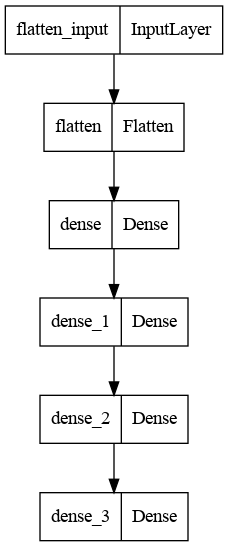

In [13]:
tf.keras.utils.plot_model(model)

In [14]:
model.layers

In [15]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [16]:
model.fit(X_train_full, y_train_full, epochs=30, class_weight={0:1.0, 1:4.0})

Epoch 1/30
437/437 [==============================] - 8s 13ms/step - loss: 0.1004 - accuracy: 0.9718
Epoch 2/30
437/437 [==============================] - 6s 14ms/step - loss: 0.0448 - accuracy: 0.9856
Epoch 3/30
437/437 [==============================] - 6s 13ms/step - loss: 0.0343 - accuracy: 0.9885
Epoch 4/30
437/437 [==============================] - 6s 14ms/step - loss: 0.0301 - accuracy: 0.9896
Epoch 5/30
437/437 [==============================] - 7s 15ms/step - loss: 0.0241 - accuracy: 0.9923
Epoch 6/30
437/437 [==============================] - 5s 12ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 7/30
437/437 [==============================] - 6s 13ms/step - loss: 0.0205 - accuracy: 0.9941
Epoch 8/30
437/437 [==============================] - 6s 13ms/step - loss: 0.0250 - accuracy: 0.9921
Epoch 9/30
437/437 [==============================] - 6s 13ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 10/30
437/437 [==============================] - 5s 12ms/step - loss: 0.0189 - accura

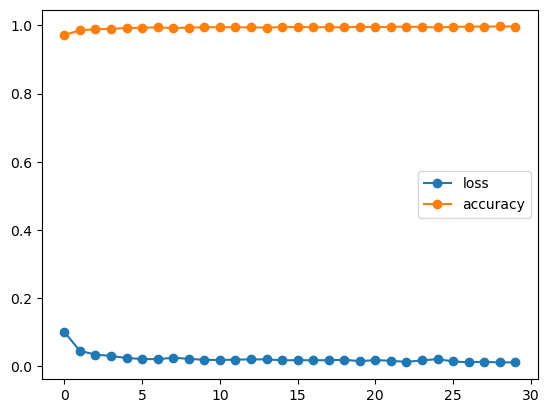

In [17]:
df = pd.DataFrame(model.history.history)
plt.plot(df, '-o', label=df.columns.tolist())
plt.legend()

In [18]:
y_pred = np.int64(np.round(model.predict(X_test_full)))

110/110 [==============================] - 1s 5ms/step


In [19]:
#df2 = pd.DataFrame({'Prediction':y_pred.flatten(),'Test':y_test.flatten()})

#y_pred = y_pred.flatten()
#y_comp = y_test.flatten()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy_score(y_test_full, y_pred)

0.9951303351475222

In [25]:
np.count_nonzero(y_pred), np.count_nonzero(y_test_full)

(157, 154)

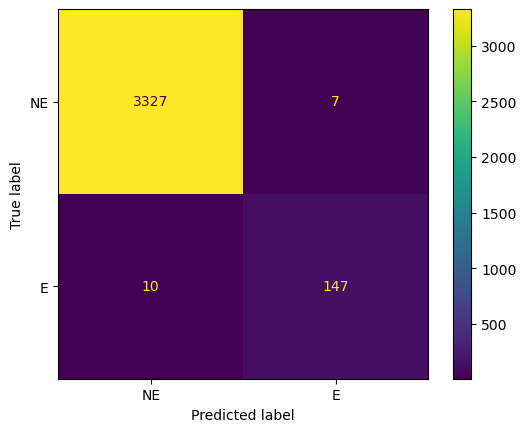

In [26]:
cm1 = confusion_matrix(y_pred, y_test_full, labels=[0, 1])
disp1 = ConfusionMatrixDisplay(cm1, display_labels=["NE", "E"])

disp1.plot()
#plt.subplot( figsize=(12,5))
#plt.grid(False)
##disp1.plot(cmap="Blues")
#plt.gcf().autofmt_xdate()
#plt.tight_layout()

In [32]:
def metrics_from_confusion_matrix(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    TPR = TP/(TP+FN)    # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP)    # Specificity or true negative rate
    PPV = TP/(TP+FP)    # Precision or positive predictive value
    NPV = TN/(TN+FN)    # Negative predictive value
    FPR = FP/(FP+TN)    # Fall out or false positive rate
    FNR = FN/(TP+FN)    # False negative rate
    FDR = FP/(TP+FP)    # False discovery rate 
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    BA = (TPR+TNR)/2
    MCC = (TP*TN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    print(f'TPR == {TPR}')
    print(f'FPR == {FPR}\n')
    print(f'ACC == {ACC}')
    print(f'BA == {ACC}')
    print(f'MCC == {MCC}')
    
metrics_from_confusion_matrix(cm1)

TPR == [0.99790042 0.93630573]
FPR == [0.06369427 0.00209958]

ACC == [0.99513034 0.99513034]
BA == [0.99513034 0.99513034]
MCC == [0.94297254 0.94297254]


In [43]:
model.save("DGene_model.h5")

test on full DepMap

In [44]:
model = keras.models.load_model("DGene_model.h5")

In [37]:
data_2 =pd.read_csv("/home/emanuele/Postdoc_ICAR/results/test_programs/test_EnGene/CRISPRGeneEffect.csv", index_col=0)
data_2 = data_2.T

In [38]:
data_full = data_2.to_numpy()

In [47]:
X_train_full, X_test_full, y_train_full, y_test_full  = train_test_split(data_full, y_full,  test_size=0.20, random_state=42)

In [48]:
X_train_full.shape

(13962, 1078)

In [55]:
model.input

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'flatten_input')>